<a href="https://colab.research.google.com/github/gtsagkatakis/OptimizationMethods_2023/blob/main/573_PSO_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on the code from
https://machinelearningmastery.com/a-gentle-introduction-to-particle-swarm-optimization/

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
from IPython.display import clear_output

In [12]:
def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)

# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)

# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

In [13]:
# Initialize data
def initialize(X):
    pbest = X
    pbest_obj = f(X[0], X[1])
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
    return pbest,gbest_obj

def update(n_particles, V, X, pbest, pbest_obj, gbest, gbest_obj):
    "Function to do one iteration of particle swarm optimization"

    # Update params
    r1, r2 = np.random.rand(2)
    P1=w * V
    P2= c1*r1*(pbest - X)
    P3=c2*r2*(gbest.reshape(-1,2).T-X)
    V = P1 + P2 + P3
    #V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    #V = w * V + c1*r1*(pbest - X) + c2*r2*(np.tile(gbest,(2,n_particles))-X)
    X = X + V
    obj = f(X[0], X[1])
    P45=X[:, (pbest_obj >= obj)]
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
    return V, X, pbest, pbest_obj, gbest, gbest_obj

In [14]:
show_plots=False


np.random.seed(1)

num_iterations=100

n_particles = 10

# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8

# Create particles
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1
pbest_obj = f(X[0], X[1])

pbest,gbest_obj=initialize(X)
gbest = pbest
gbest_list=[]
for i in range(num_iterations):
    V, X, pbest, pbest_obj, gbest, gbest_obj=update(n_particles,V, X, pbest, pbest_obj, gbest, gbest_obj)  # Update particle positions and velocities
    gbest_list.append(gbest_obj)

    if show_plots:
      # Create a new figure for each iteration
      fig, ax = plt.subplots(figsize=(8,6))
      img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
      contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
      ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

      # Plot the particles and their velocities
      ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
      ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)

      # Additional plot settings
      ax.set_xlim([0,5])
      ax.set_ylim([0,5])
      ax.set_title(f'Iteration {i},gbest {gbest[0]}')

      plt.show()




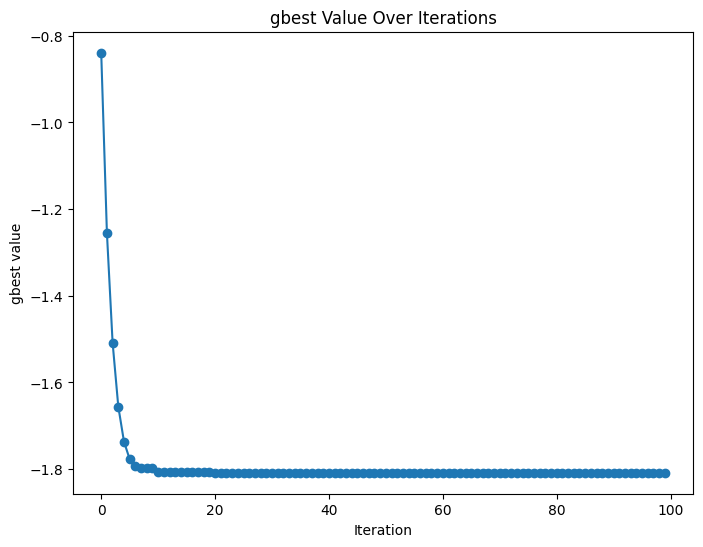

PSO found best solution at f([3.18515567 3.12980341])=-1.8083520359190952
Global optimal at f([3.1818181818181817, 3.131313131313131])=-1.8082706615747688


In [15]:
plt.figure(figsize=(8, 6))
plt.plot(gbest_list, marker='o')
plt.xlabel('Iteration')
plt.ylabel('gbest value')
plt.title('gbest Value Over Iterations')
plt.show()
print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min, y_min], f(x_min, y_min)))

In [16]:
#anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
#anim.save("PSO.gif", dpi=120, writer="imagemagick")

